In [12]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['text.usetex'] = True
import sys
sys.path.append('..')
from fun_gilles import *

## Funciones

In [13]:
def plot(abundances, times, V):
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))

    # --- Create the figure and a 1-row, 3-column subplot grid ---
    # Using a wide figsize for a horizontal layout.
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=False) 
    # Note: sharex=True is removed because we need the x-axis ticks on all three plots, 
    # although they are the same (time).

    # --- Subplot 1 (Left): Concentration ---
    ax1 = axes[0]
    for i in range(len(species)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times, abundances[:, i] / V, label=species[i], color=colors[i], alpha=0.9)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Concentration")
    ax1.set_title("Concentration Evolution")

    # --- Subplot 2 (Middle): Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Volume")
    ax2.set_title("Volume Evolution")


    # --- Subplot 3 (Right): Abundances and Legend ---
    ax3 = axes[2]
    for i in range(len(species)):
        ax3.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)
    ax3.grid(True, linestyle='--', alpha=0.3)
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Abundances")
    ax3.set_title("Abundance Evolution")
    # Place the legend here, slightly outside the plot area for all species
    ax3.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Species")


    # --- Final Touches ---
    # Add a figure-wide title
    fig.suptitle(f"Simulation Results (k= {k})", fontsize=16)

    # Adjust layout to prevent labels/titles from overlapping
    plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust tight_layout for a single row

    plt.show()

In [29]:
def xyeq_vs_c_ar(initial_c, initial_food,method, n_iterations, 
              reactions, k, V0, k_var):
    equilibrium = np.zeros((len(initial_c)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(k_var)))

    for j in range(len(k_var)):
        k[1] = k_var[j] 
        
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                        initial_food, k, V0)
            print(f"simulation completed for c = {i}")
            equilibrium[i] = abundances[-1, -1]/V0
        
        plt.plot(initial_c/V0, equilibrium, label="$k_{ar}$"+f"={k_var[j]:.1e}",
                color=colors[j], alpha=0.8)
            

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$[C]_0$")
    plt.ylabel("$[XY]_{eq}$")

    plt.legend()
        
    plt.show()

In [50]:
def xyeq_vs_c_br(initial_c, initial_food,method, n_iterations, 
              reactions, k, V0, k_var):
    equilibrium = np.zeros((len(initial_c)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(k_var)))

    for j in range(len(k_var)):
        k[3] = k_var[j] 
        V = V0
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                        initial_food, k, V0)
            equilibrium[i] = abundances[-1, -1]/V0
        
        plt.plot(initial_c/V0, equilibrium, label="$k_{br}$"+f"={k_var[j]:.1e}",
                color=colors[j], alpha=0.8)
            

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$[C]_0$")
    plt.ylabel("$[XY]_{eq}$")

    plt.legend()
        
    plt.show()

In [71]:
def xyeq_vs_k_ar(initial_c, initial_food,method, n_iterations, 
                 reactions, k, V, k_var):
    equilibrium = np.zeros((len(k_var)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(initial_c)))

        
    for i in range(len(initial_c)):
        initial_food[0] = initial_c[i]
        
        for j in range(len(k_var)):
            k[1] = k_var[j]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                        initial_food, k, V)
            equilibrium[j] = abundances[-1, -1]/V
        
        plt.plot(k_var, equilibrium, label="$C_0$"+f"={initial_c[i]}",
                color=colors[i], alpha=0.8)
        
    plt.xscale("log")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$k_{ar}$")
    plt.ylabel("$[XY]_{eq}$")

    plt.legend()
        
    plt.show()

def xyeq_vs_k_br(initial_c, initial_food, method, n_iterations, 
                 reactions, k, V, k_var):
    equilibrium = np.zeros((len(k_var)))
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(initial_c)))

        
    for i in range(len(initial_c)):
        initial_food[0] = initial_c[i]
        
        for j in range(len(k_var)):
            k[3] = k_var[j]
            abundances, times, V = chemistry(method, n_iterations, f, 
                                            initial_food, k, V)
            equilibrium[j] = abundances[-1, -1]/V
        
        plt.plot(k_var, equilibrium, label="$C_0$"+f"={initial_c[i]}",
                color=colors[i], alpha=0.8)
        
    plt.xscale("log")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$k_{br}$")
    plt.ylabel("$[XY]_{eq}$")
    plt.legend()
        
    plt.show()

def time_evolution(method, n_iterations, reactions, initial_food, k, V):
    species = obtain_species(reactions)
    abundances, times, V = chemistry(method, n_iterations, f, initial_food,
                                     k, V)

    # Representation
    plt.figure()
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    plt.grid()

    for i in range(len(species)):
        plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Abundances")
    plt.legend()
    plt.title(f"{method} time evolution: k= {k}")
        
    print(f"Parameters used for simulation:\n\
    Initial abundances:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
    C_0={initial_food[0]}\n\
    k_a = {k[0]}; k_a_r = {k[1]}\n\
    k_b= {k[2]}, k_b_r={k[3]}\n\
    # iterations = {n_iterations}")

    plt.show()
    
def time_evolution_concentration(method, n_iterations, reactions, initial_food, k, V):
    species = obtain_species(reactions)
    abundances, times, V = chemistry(method, n_iterations, f, initial_food,
                                     k, V)

    # Representation
    plt.figure()
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    plt.grid()

    for i in range(len(species)):
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Concentrations")
    plt.legend()
    plt.title(f"{method} time evolution: k= {k}")
        
    print(f"Parameters used for simulation:\n\
    Initial abundances:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
    C_0={initial_food[0]}\n\
    k_a = {k[0]}; k_a_r = {k[1]}\n\
    k_b= {k[2]}, k_b_r={k[3]}\n\
    # iterations = {n_iterations}")

    plt.show()

In [17]:
f = "../examples/reactions_XYC.txt" # M reactions
method = "Deterministic" # Gillespie or Deterministic

# obtener reacciones y especies:
reactions = read_file(f)
species = obtain_species(reactions)

# Analítico

In [18]:
initial_c = [1000]*3+[0]*2
k = [1]*4
iterations = 20000
V = 1
method = "Gillespie"
abundances, times, V = chemistry(method, iterations, f, initial_c, k, V)

Parameters used for simulation:
Initial abundances:
X_0=1000
Y_0=1000
C_0=1000
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=1
# iterations = 20000


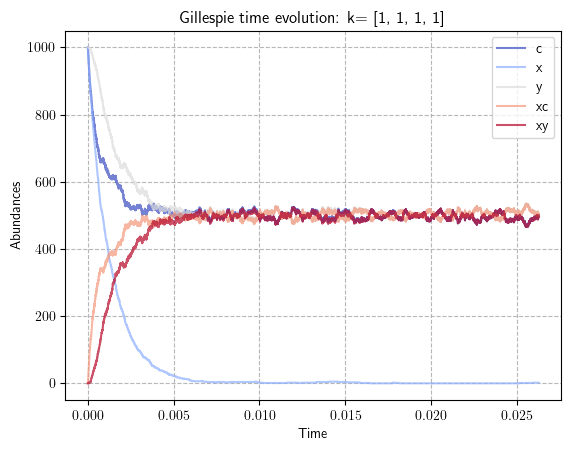

In [19]:
plt.figure()
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.grid()

for i in range(len(species)):
    plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time")
plt.ylabel("Abundances")
plt.legend()
plt.title(f"{method} time evolution: k= {k}")
    
print(f"Parameters used for simulation:\n\
Initial abundances:\nX_0={initial_c[1]}\nY_0={initial_c[2]}\n\
C_0={initial_c[0]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {iterations}")

plt.show()

In [20]:
initial_c = [100]+[1000]*2+[0]*2
k = [1]*4
iterations = 20000
V = 1
method = "Gillespie"
abundances, times, V = chemistry(method, iterations, f, initial_c, k, V)

Parameters used for simulation:
Initial abundances:
X_0=1000
Y_0=1000
C_0=100
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=1
# iterations = 20000


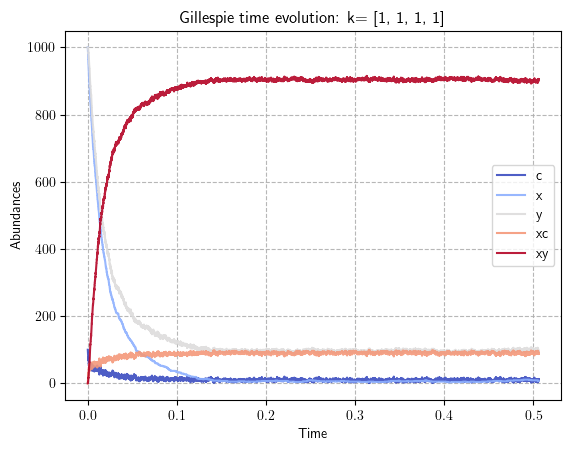

In [21]:
plt.figure()
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.grid()

for i in range(len(species)):
    plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time")
plt.ylabel("Abundances")
plt.legend()
plt.title(f"{method} time evolution: k= {k}")
    
print(f"Parameters used for simulation:\n\
Initial abundances:\nX_0={initial_c[1]}\nY_0={initial_c[2]}\n\
C_0={initial_c[0]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {iterations}")

plt.show()

In [22]:
print(abundances[-5:,:])

[[ 12.   7.  95.  88. 905.]
 [ 11.   7.  96.  89. 904.]
 [ 10.   7.  97.  90. 903.]
 [ 11.   7.  96.  89. 904.]
 [ 12.   7.  95.  88. 905.]]


# Modificaciones en $k_{ar}$

Remarkably, the performance of these perfect enzymes is limited by diffusion, as indicated by the values of their second order rate constant (kcat/Km) which are comparable to the rate constant for the diffusional encounter of spherical particles, i.e. 1010 M−1s−1.

https://www.sciencedirect.com/science/article/pii/S0006291X25001500

## Con $k_{br}=0$

In [33]:
f = "../examples/reactions_XYC.txt" # M reactions
method = "Deterministic" # Gillespie or Deterministic

# obtener reacciones y especies:
reactions = read_file(f)
species = obtain_species(reactions)

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

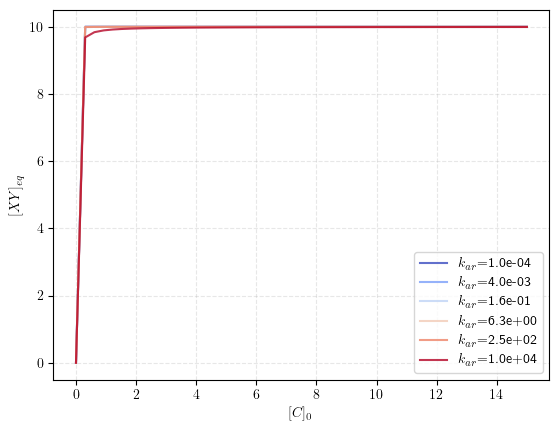

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.00000000e-04 3.98107171e-03 1.58489319e-01 6.30957344e+00
 2.51188643e+02 1.00000000e+04]
k_b= 1, k_b_r=0
# iterations = 100000


In [34]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 1
initial_food = [0,10,10]+ [0]*2 # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 4, 6)
n_iterations = 100000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, f,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

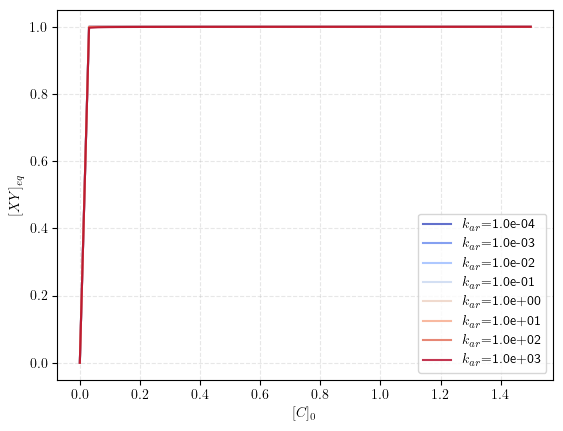

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=0
# iterations = 100000000


In [35]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10]+ [0]*2 # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
           k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=0
    # iterations = 19000


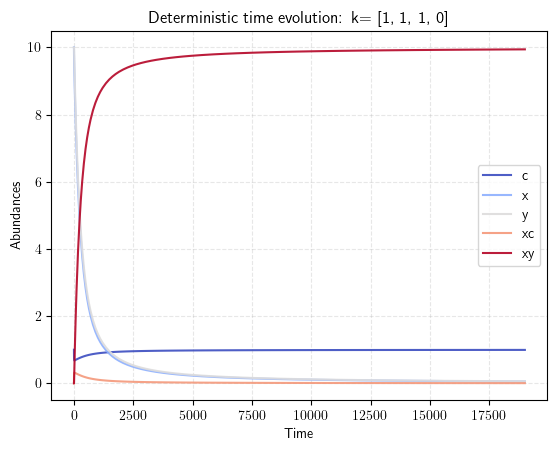

In [64]:
k = [1,1,1,0] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [1,10,10] + [0]*2# initial molecules number
n_iterations = 19000

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

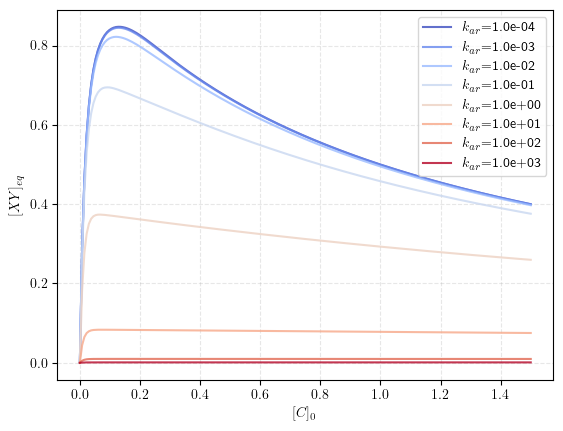

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 1000


In [37]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10] + [0]*2# initial molecules number
initial_c = (np.linspace(0,15,200))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

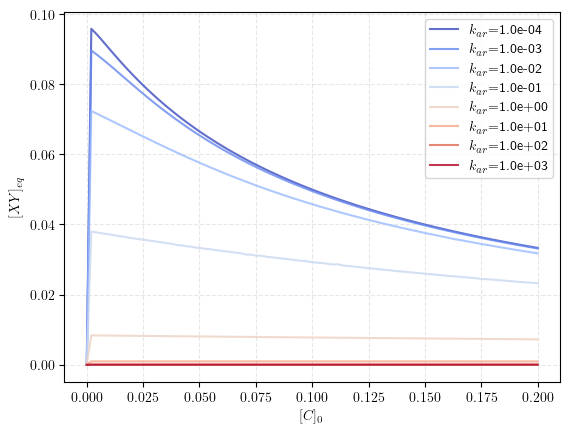

Parameters used for simulation:
Initial concentrations:
X_0=1
Y_0=1
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 100000000


In [38]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,1,1] + [0]*2# initial molecules number
initial_c = (np.linspace(0,2,100))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000

xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=0.001
    k_a = 1; k_a_r = 0.0001
    k_b= 1, k_b_r=1
    # iterations = 100000000


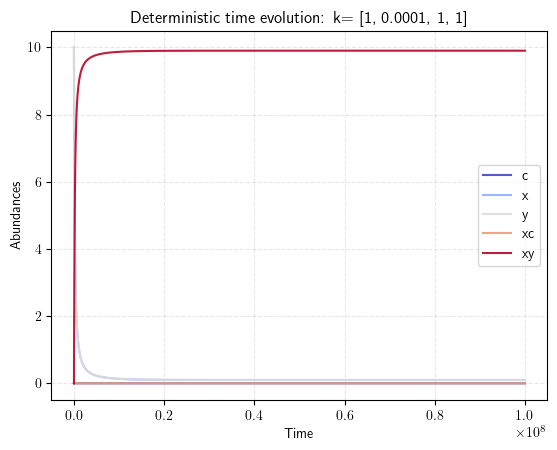

In [65]:
# Reaction constants:
k = [1,1e-4,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0.001,10,10] + [0]*2# initial molecules number
n_iterations = 100000000
time_evolution(method, n_iterations, reactions, initial_food,
                k, V)

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 20
simulation completed for c = 21
simulation completed for c = 22
simulation completed for c = 23
simulation completed for c = 24
simulation completed for c = 25
simulation completed for c = 26
simulation completed for c = 27
simulation completed for c = 28
simulation completed for c = 29
simulation completed for c = 30
simulation complet

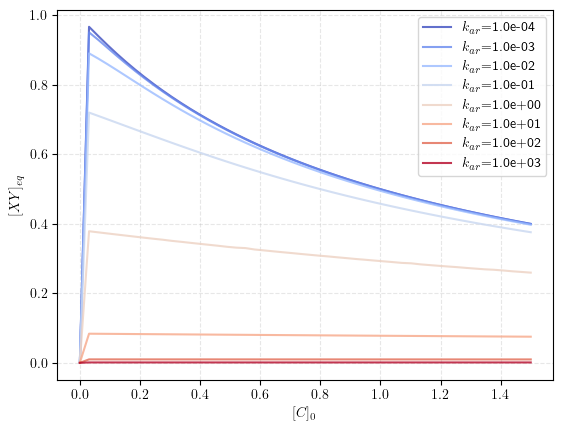

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
k_b= 1, k_b_r=1
# iterations = 1000000


In [40]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10]+ [0]*2 # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000000
method = "Deterministic"


xyeq_vs_c_ar(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_var}\n\
k_b= {k[2]}, k_b_r={k[3]}\n\
# iterations = {n_iterations}")

## $k_{ar}$ Gillespie con $k_{br}=1$

simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c = 11
simulation completed for c = 12
simulation completed for c = 13
simulation completed for c = 14
simulation completed for c = 15
simulation completed for c = 16
simulation completed for c = 17
simulation completed for c = 18
simulation completed for c = 19
simulation completed for c = 0
simulation completed for c = 1
simulation completed for c = 2
simulation completed for c = 3
simulation completed for c = 4
simulation completed for c = 5
simulation completed for c = 6
simulation completed for c = 7
simulation completed for c = 8
simulation completed for c = 9
simulation completed for c = 10
simulation completed for c =

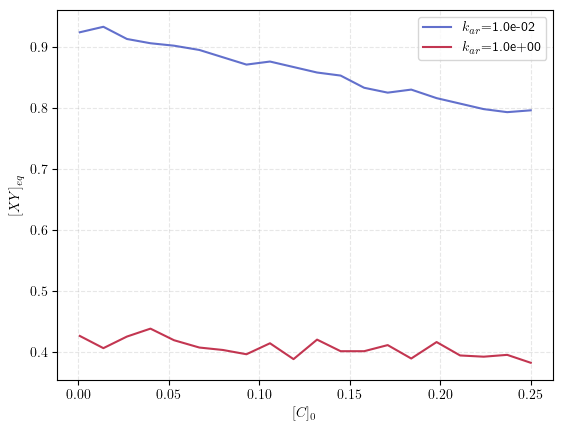

In [41]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [0,1000,1000] + [0]*2 # initial molecules number
initial_c = np.round(np.linspace(1,250,20))
k_var = [1e-2,1]
n_iterations = 40000
method = "Gillespie"

xyeq_vs_c_ar(initial_c, initial_food,method, n_iterations, 
            reactions, k, V, k_var)

Esta no nos convence mucho, así que vamos a comprobar la evolución para $[C]_0 = 0.001$ y $[C]_0= 0.01$ con $k_{ar}=1$

Parameters used for simulation:
    Initial abundances:
X_0=1000
Y_0=1000
    C_0=100
    k_a = 1; k_a_r = 0.001
    k_b= 1, k_b_r=1
    # iterations = 100000


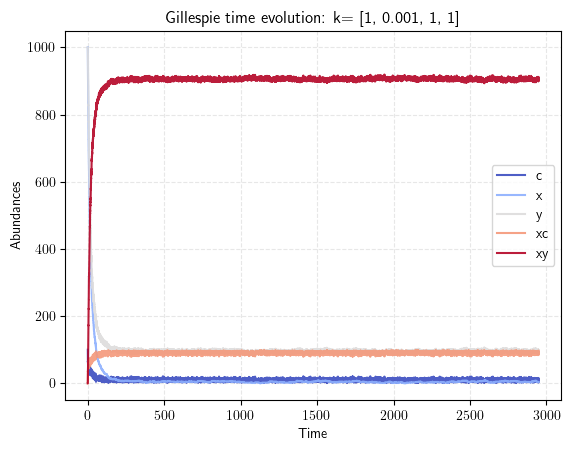

In [66]:
# Reaction constants:
k = [1,1e-3,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [100,1000,1000,0,0] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 4, 6)
n_iterations = 100000
method = "Gillespie"
time_evolution(method, n_iterations, reactions, initial_food, k, V)

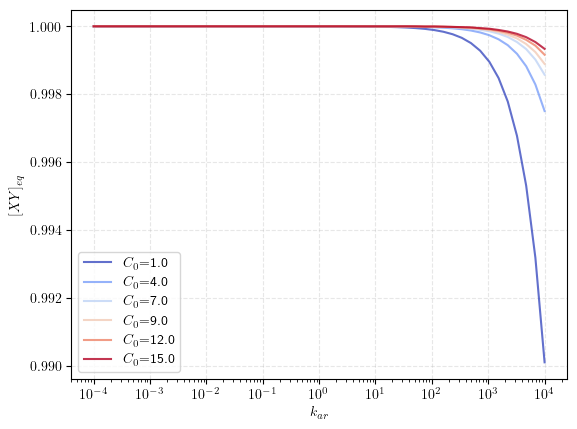

In [43]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 100000000
method = "Deterministic"

xyeq_vs_k_ar(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)


## sale así porque a k muy alta no llega al equilibrio !!!

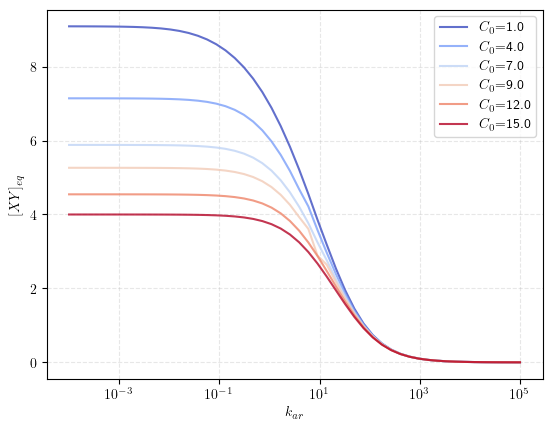

In [46]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 1

# condiciones iniciales
initial_food = [0,10,10,0,0] # initial molecules number
food_molecules = 3

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 5, 50)
n_iterations = 100000

xyeq_vs_k_ar(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)

# Modificaciones en $k_{br}$

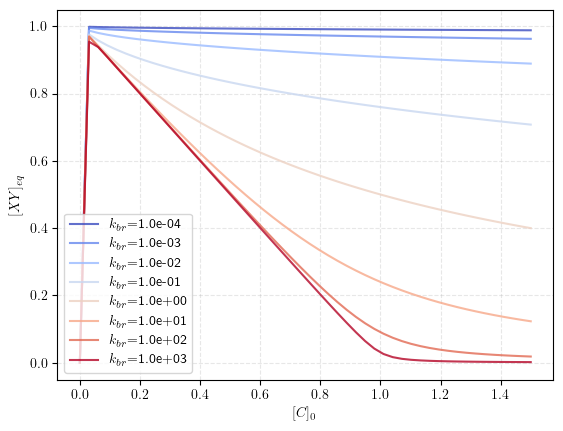

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 0
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 10000000


In [47]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 10000000

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

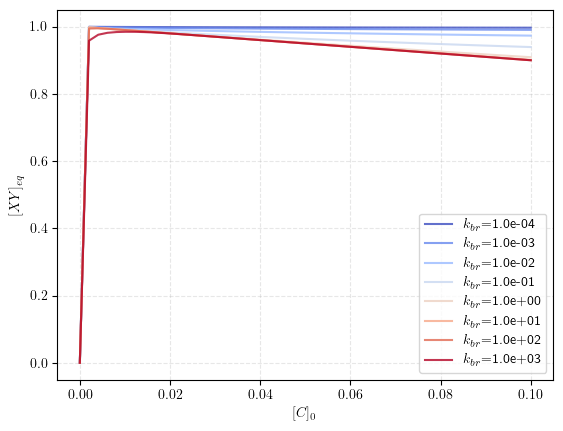

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 0
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 100000000


In [48]:
# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0] # initial molecules number
initial_c = (np.linspace(0,1,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 100000000
method = "Deterministic"

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

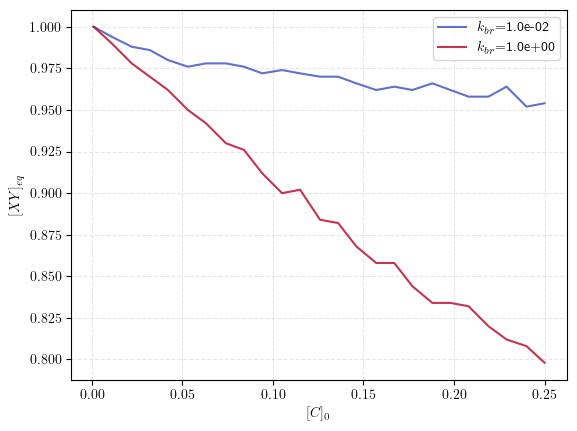

In [51]:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [0,1000,1000,0,0] # initial molecules number
initial_c = np.round(np.linspace(1,250,25))
k_var = [1e-2,1]
n_iterations = 20000
method = "Gillespie"

xyeq_vs_c_br(initial_c, initial_food,method, n_iterations, 
            reactions, k, V, k_var)

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=6
    k_a = 1; k_a_r = 0
    k_b= 1, k_b_r=1
    # iterations = 700


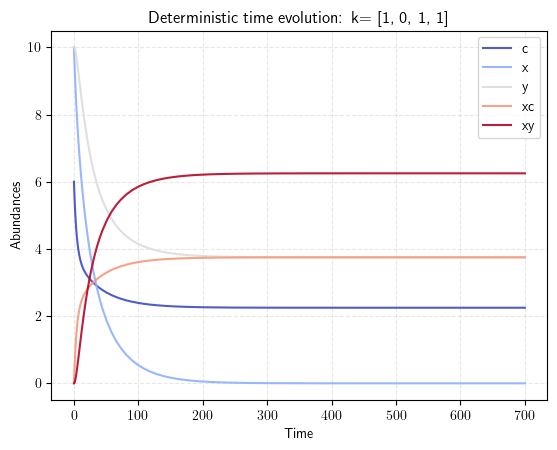

In [67]:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [6,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 700
method = "Deterministic"

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

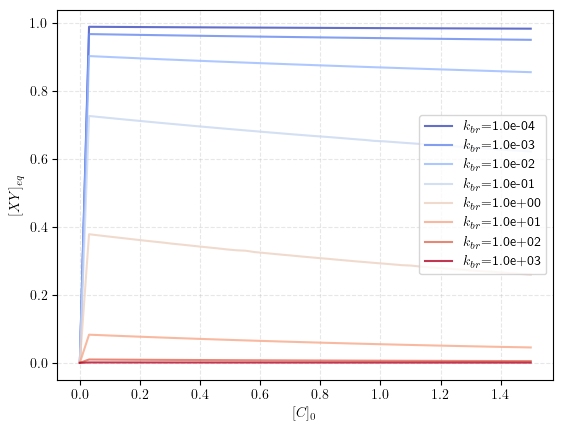

Parameters used for simulation:
Initial concentrations:
X_0=10
Y_0=10
k_a = 1; k_a_r = 1
k_b= 1, k_b_r=[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
# iterations = 1000000


In [56]:
# Reaction constants:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0] # initial molecules number
initial_c = (np.linspace(0,15,50))
k_var = np.logspace(-4, 3, 8)
n_iterations = 1000000

xyeq_vs_c_br(initial_c, initial_food, method, n_iterations, reactions,
          k, V, k_var)

print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k[1]}\n\
k_b= {k[2]}, k_b_r={k_var}\n\
# iterations = {n_iterations}")

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=4
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 500


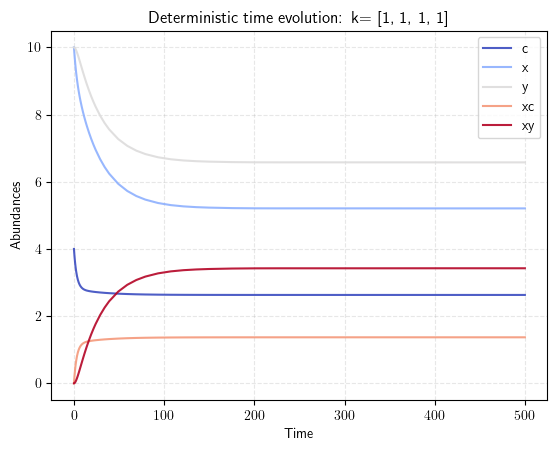

In [68]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [4,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 500

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

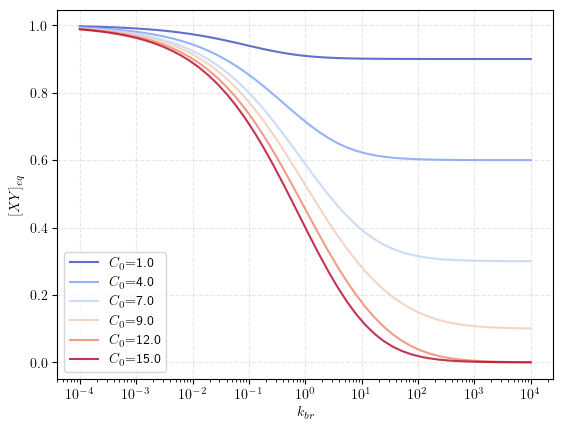

In [74]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 1000000000

xyeq_vs_k_br(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 0
    k_b= 1, k_b_r=10000.0
    # iterations = 1000000


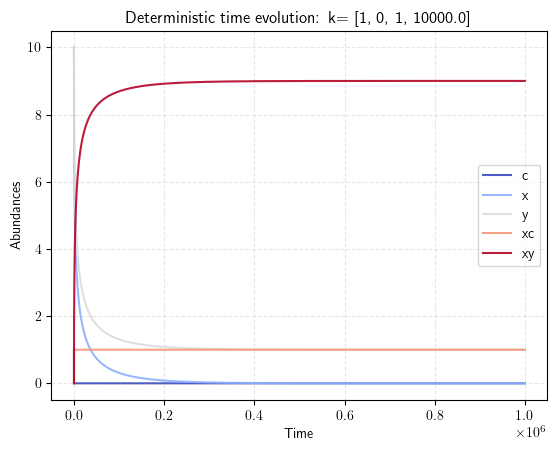

In [72]:
k = [1,0,1,1e4] # len(k)= # de reacciones
# Volume:
V = 1

# condiciones iniciales
initial_food = [1,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 1000000

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

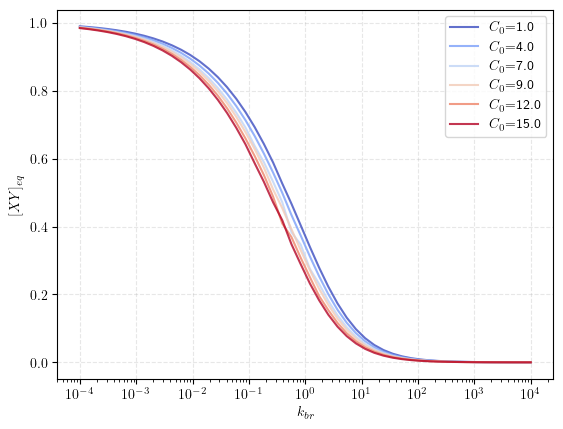

In [73]:
# Reaction constants:
k = [1,1,1,0] # len(k)= # de reacciones
# Volume:
V = 10
initial_food = [0,10,10,0,0]

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,15,6))
k_var = np.logspace(-4, 4, 50)
n_iterations = 100000000

xyeq_vs_k_br(initial_c, initial_food, method, 
             n_iterations, reactions, k, V, k_var)

Parameters used for simulation:
    Initial abundances:
X_0=10
Y_0=10
    C_0=1
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 1000


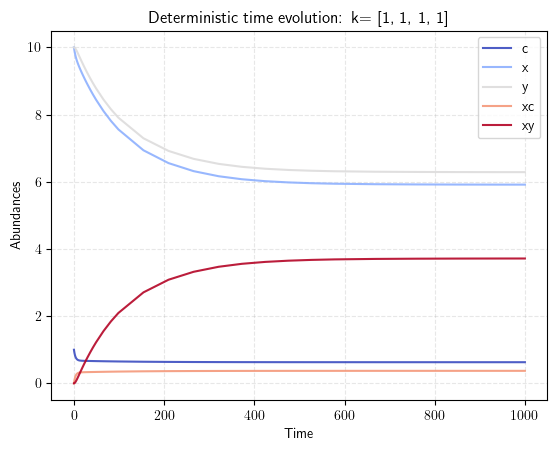

In [77]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10

# condiciones iniciales
initial_food = [1,10,10,0,0] # initial molecules number
food_molecules = 3
n_iterations = 1000

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

Parameters used for simulation:
    Initial abundances:
X_0=1000
Y_0=1000
    C_0=200
    k_a = 1; k_a_r = 1
    k_b= 1, k_b_r=1
    # iterations = 10000


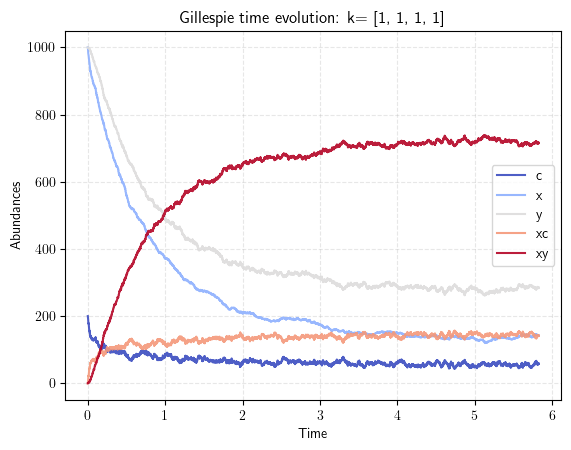

In [79]:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 100
# condiciones iniciales
initial_food = [200,1000,1000,0,0] # initial molecules number
food_molecules = 3
n_iterations = 10000
method = "Gillespie"

time_evolution(method, n_iterations, reactions, initial_food,
               k, V)

# Cambios en $k_{ar}, k_{br}$ simultáneos (descartado)

In [ ]:
# Initialization:
file = "reactions_XYC.txt" # M reactions
method = "Deterministic" # Gillespie or Deterministic

# Reaction constants:
k = [100,100,100,100] # len(k)= # de reacciones
# Volume:
V = 1

# condiciones iniciales
initial_food = [0,10000,10000] # initial molecules number
food_molecules = 3

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)

# Different values for initial C concentration and k_var:
initial_c = np.round(np.linspace(1,25000,100))
k_arvar = np.logspace(4, 8, 3)
k_brvar = np.logspace(-2, 2, 3)
n_iterations = 100000

equilibrium = np.zeros((len(initial_c)))
colors = plt.cm.Spectral(np.linspace(0, 1, len(k_brvar)+3))
linestyles = ['-', '--', ':', '-.', (0, (3, 5, 1, 5))] 

for j in range(len(k_brvar)):
    k[3] = k_brvar[j]
    for h in range(len(k_arvar)):
        k[1] = k_arvar[h]
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times = chemistry(method, n_iterations, reactions, 
                                          food_molecules, initial_food, k, V)
            equilibrium[i] = abundances[-1, -1]
        
        plt.plot(initial_c, equilibrium, 
                 label="$k_{ar}$"+f"={k_arvar[h]:.1e}\n"+"$k_{br}$"+f"={k_brvar[j]:.1e}",
                 color=colors[j], linestyle= linestyles[h % len(linestyles)],
                 alpha=0.8)
        

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel("$C_0$")
plt.ylabel("$XY_{eq}$")

plt.legend(fontsize='small', loc= "upper right")
    
plt.show()


print(f"Parameters used for simulation:\n\
Initial concentrations:\nX_0={initial_food[1]}\nY_0={initial_food[2]}\n\
k_a = {k[0]}; k_a_r = {k_arvar}\n\
k_b= {k[2]}, k_b_r={k_brvar}\n\
# iterations = {n_iterations}")